先找出每項數據中的前十名球員、位置

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv')

numeric_columns = df.select_dtypes(include=['number']).columns
top_players_info = df[numeric_columns].apply(lambda x: pd.Series({'Player': df.loc[x.nlargest(10).index, 'Player'].tolist(), 'Pos': df.loc[x.nlargest(10).index, 'Pos'].tolist(), 'Top Values': x.nlargest(10).tolist()}))
top_players_info = top_players_info.drop(['Rk','Age','G','GS','FG%','3P%','2P%','FT%','eFG%'], axis=1)
print(top_players_info)

                                                           MP  \
Player      [Kevin Durant, Pascal Siakam, Kyrie Irving, Ja...   
Pos                  [PF, PF, PG, SF, PF, PG, SG, SF, SF, SG]   
Top Values  [44.0, 43.3, 42.5, 41.0, 40.6, 40.4, 39.9, 39....   

                                                           FG  \
Player      [Nikola Jokic, Giannis Antetokounmpo, Luka Don...   
Pos                   [C, PF, PG, SF, SF, PG, PG, SG, PF, SF]   
Top Values  [12.2, 11.7, 10.7, 9.8, 9.3, 9.2, 9.0, 8.8, 8....   

                                                          FGA  \
Player      [Giannis Antetokounmpo, Luka Doncic, Donovan M...   
Pos                   [PF, PG, SG, C, PF, SG, PG, PG, SF, SF]   
Top Values  [23.8, 23.5, 22.2, 21.2, 20.8, 20.8, 20.4, 20....   

                                                           3P  \
Player      [Stephen Curry, Anthony Edwards, Desmond Bane,...   
Pos                  [PG, SG, SF, SG, PG, SF, SG, SF, SF, PG]   
Top Values  [4.1, 3.8,

將原先的資料集依照位置(Pos)分成五個子資料集

In [4]:
import pandas as pd
df = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv')
grouped_data = df.groupby('Pos')
#for pos, group in grouped_data:
    #print(f"Position: {pos}")
    #print(group)
    #print("\n")
C_data = grouped_data.get_group('C')
PF_data = grouped_data.get_group('PF')
SF_data = grouped_data.get_group('SF')
SG_data = grouped_data.get_group('SG')
PG_data = grouped_data.get_group('PG')

目的: 透過不同位置球員對於自身位置的較佳數據來進行與其他數據之間的特徵重要性與相關性分析，以了解每個位置球員擅長的工作與技能。

1. 中鋒(C)位置的總籃板數(TRB)與其他哪項數據具有最高的特徵重要性與相關性?

C - Mean Squared Error: 2.1628263750000003
   Feature  Importance
18     DRB    0.796076
3       MP    0.050294
17     ORB    0.039009
24     PTS    0.020767
5      FGA    0.020677
22     TOV    0.013943
1        G    0.007847
23      PF    0.005977
21     BLK    0.004704
11     2PA    0.004629
0      Age    0.004407
8      3PA    0.004039
2       GS    0.003235
15     FTA    0.003057
9      3P%    0.003043
10      2P    0.002858
16     FT%    0.002411
19     AST    0.002056
12     2P%    0.001826
4       FG    0.001758
7       3P    0.001594
13    eFG%    0.001584
6      FG%    0.001523
14      FT    0.001401
20     STL    0.001285


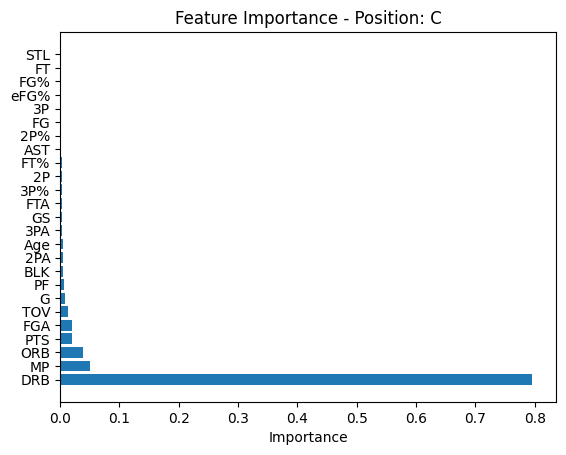

   Feature  Correlation
0      DRB     0.981703
1       MP     0.888796
2      ORB     0.867317
3      PTS     0.816351
4      FGA     0.814434
5      2PA     0.808777
6       FG     0.788396
7       2P     0.751744
8      AST     0.733885
9      FTA     0.709307
10      FT     0.701355
11     TOV     0.697298
12      PF     0.687619
13     3PA     0.544540
14      3P     0.514340
15     BLK     0.468295
16      GS     0.442519
17     STL     0.417724
18     FT%     0.364054
19       G     0.153366
20     3P%     0.043391
21     Age    -0.086496
22    eFG%    -0.088617
23     FG%    -0.101922
24     2P%    -0.118564


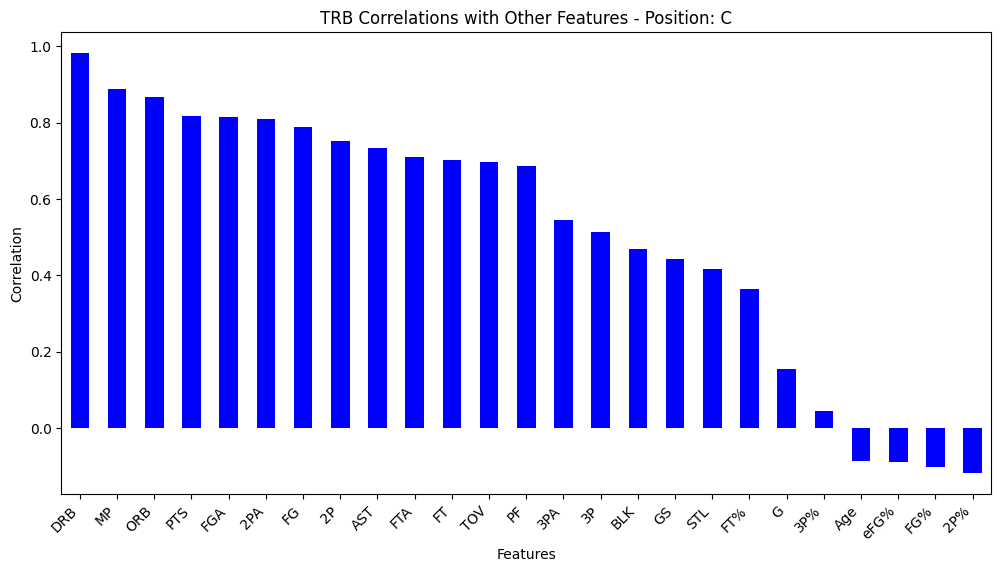

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
C_data = C_data.copy()

X = C_data.drop(['Pos', 'Rk', 'Player', 'Tm', 'TRB'], axis=1)
y = C_data['TRB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'C - Mean Squared Error: {mse}')


features = C_data.drop(['Pos', 'Rk', 'Player', 'Tm', 'TRB'], axis=1)
target = C_data['TRB']


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)


feature_importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Position: C')
plt.show()

C_data = C_data.drop(['Rk', 'Player', 'Tm', 'Pos'], axis=1)
correlation_matrix = C_data.corr()


trb_correlations = correlation_matrix['TRB']
sorted_trb_correlations = trb_correlations.drop('TRB').sort_values(ascending=False)

correlation_df = pd.DataFrame({'Feature': sorted_trb_correlations.index, 'Correlation': sorted_trb_correlations.values})
print(correlation_df)

plt.figure(figsize=(12, 6))
sorted_trb_correlations.plot(kind='bar', color='blue')
plt.title('TRB Correlations with Other Features - Position: C')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()


Ans: 從圖表中可看出，中鋒(C)位置的總籃板數(TRB)與防守籃板數(DRB)具有最高的特徵重要性與相關性，表示中鋒在場上搶籃板時，是以鞏固防守籃板為主要工作。

2. 大前鋒(PF)位置的兩分球命中數(2P)與其他哪項數據具有最高的特徵重要性與相關性?

PF - Mean Squared Error: 0.46914079999999725
   Feature  Importance
10     2PA    0.646719
4       FG    0.116481
5      FGA    0.037399
13      FT    0.030901
19     AST    0.030504
24     PTS    0.027844
14     FTA    0.015872
17     DRB    0.011863
22     TOV    0.011504
21     BLK    0.011081
3       MP    0.009911
18     TRB    0.009699
16     ORB    0.006643
12    eFG%    0.005345
11     2P%    0.004980
2       GS    0.004912
15     FT%    0.003291
9      3P%    0.002828
20     STL    0.002294
8      3PA    0.001981
6      FG%    0.001886
0      Age    0.001724
1        G    0.001527
7       3P    0.001514
23      PF    0.001298


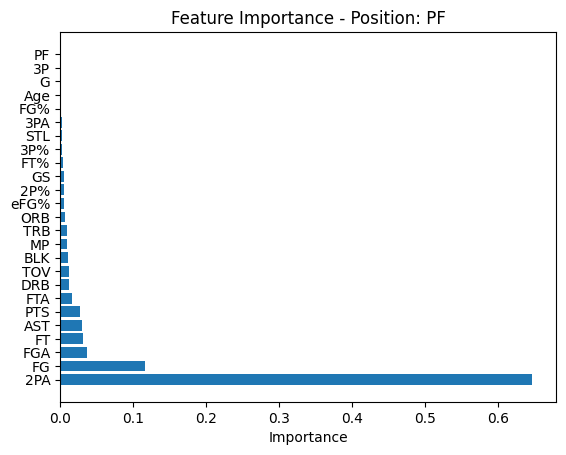

   Feature  Correlation
0      2PA     0.981393
1       FG     0.964967
2      PTS     0.942411
3      FGA     0.938327
4      FTA     0.913746
5       FT     0.895701
6      DRB     0.866726
7      TRB     0.844939
8      AST     0.819647
9      TOV     0.812439
10      MP     0.799645
11      PF     0.629591
12     STL     0.606246
13     ORB     0.463416
14     BLK     0.450269
15     FT%     0.423799
16      GS     0.413813
17     3PA     0.397269
18     2P%     0.265690
19     FG%     0.206999
20      3P     0.189202
21     Age     0.130920
22       G     0.073197
23    eFG%     0.050211
24     3P%    -0.154412


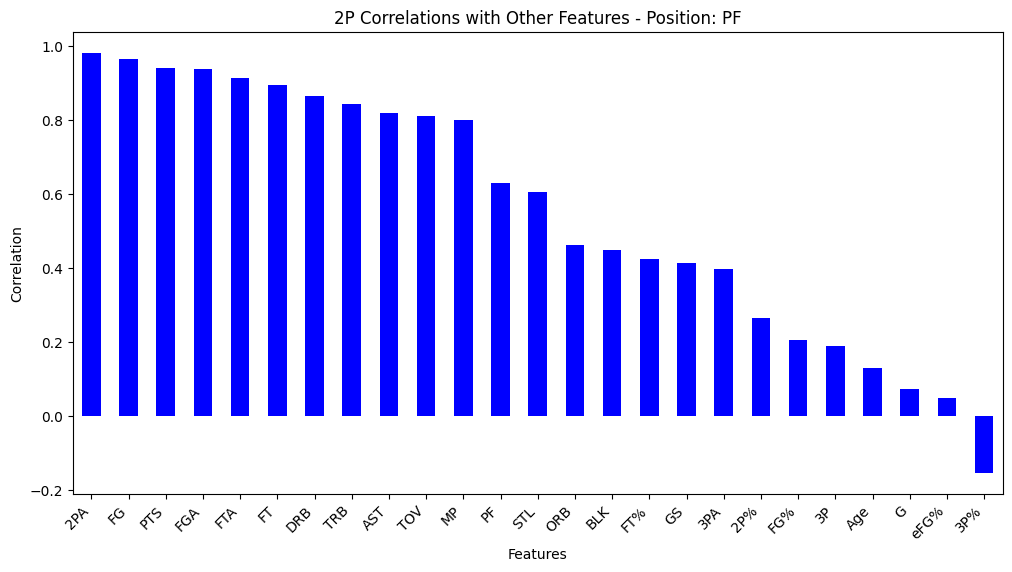

In [ ]:
PF_data=PF_data.copy()
#PF_data['Pos'] = pd.Categorical(PF_data['Pos']).codes
X = PF_data.drop(['Pos', 'Rk', 'Player', 'Tm', '2P'], axis=1)
y = PF_data['2P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'PF - Mean Squared Error: {mse}')

features = PF_data.drop(['Pos', 'Rk', 'Player', 'Tm', '2P'], axis=1)
target = PF_data['2P']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Position: PF')
plt.show()

PF_data = PF_data.drop(['Rk', 'Player', 'Tm', 'Pos'], axis=1)
correlation_matrix = PF_data.corr()

trb_correlations = correlation_matrix['2P']
sorted_trb_correlations = trb_correlations.drop('2P').sort_values(ascending=False)

correlation_df = pd.DataFrame({'Feature': sorted_trb_correlations.index, 'Correlation': sorted_trb_correlations.values})
print(correlation_df)

plt.figure(figsize=(12, 6))
sorted_trb_correlations.plot(kind='bar', color='blue')
plt.title('2P Correlations with Other Features - Position: PF')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

Ans: 從圖表中可看出，大前鋒(PF)位置的兩分球命中數(2P)與兩分球投籃數(2PA)具有最高的特徵重要性與相關性，表示靠近籃下的兩分球出手數量對於大前鋒在得分時，佔有相當大的比例以及重要性。

3. 小前鋒(SF)位置的三分球命中數(3P)與其他哪項數據具有最高的特徵重要性與相關性?

SF - Mean Squared Error: 0.08643199999999976
   Feature  Importance
7      3PA    0.683998
24     PTS    0.066492
3       MP    0.059489
22     TOV    0.050183
4       FG    0.045290
5      FGA    0.028068
20     STL    0.013105
14     FTA    0.009390
8      3P%    0.007766
0      Age    0.007461
15     FT%    0.006116
21     BLK    0.004008
17     DRB    0.002899
16     ORB    0.002740
1        G    0.002181
10     2PA    0.001840
23      PF    0.001544
6      FG%    0.001250
11     2P%    0.001178
12    eFG%    0.001152
18     TRB    0.001092
2       GS    0.000780
9       2P    0.000704
13      FT    0.000675
19     AST    0.000599


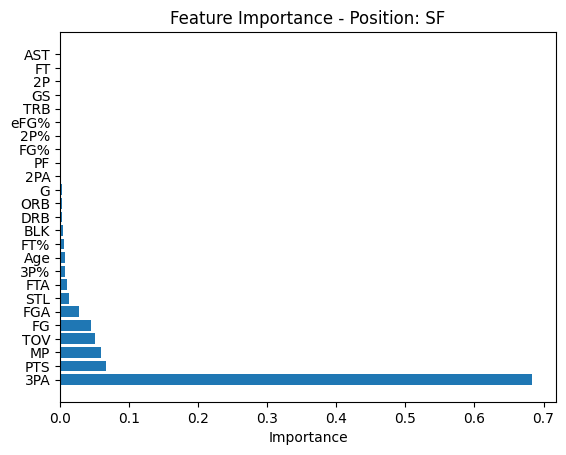

   Feature  Correlation
0      3PA     0.963188
1       MP     0.791544
2      PTS     0.781708
3      FGA     0.780590
4       FG     0.759773
5      DRB     0.713233
6      3P%     0.677236
7      TOV     0.674602
8       PF     0.671791
9      TRB     0.660980
10      GS     0.657982
11     STL     0.648525
12     AST     0.599875
13     2PA     0.528956
14     FTA     0.511204
15      FT     0.509723
16      2P     0.502206
17    eFG%     0.501450
18     BLK     0.437988
19     FG%     0.369962
20     FT%     0.356837
21       G     0.310383
22     ORB     0.290421
23     2P%     0.251298
24     Age     0.018955


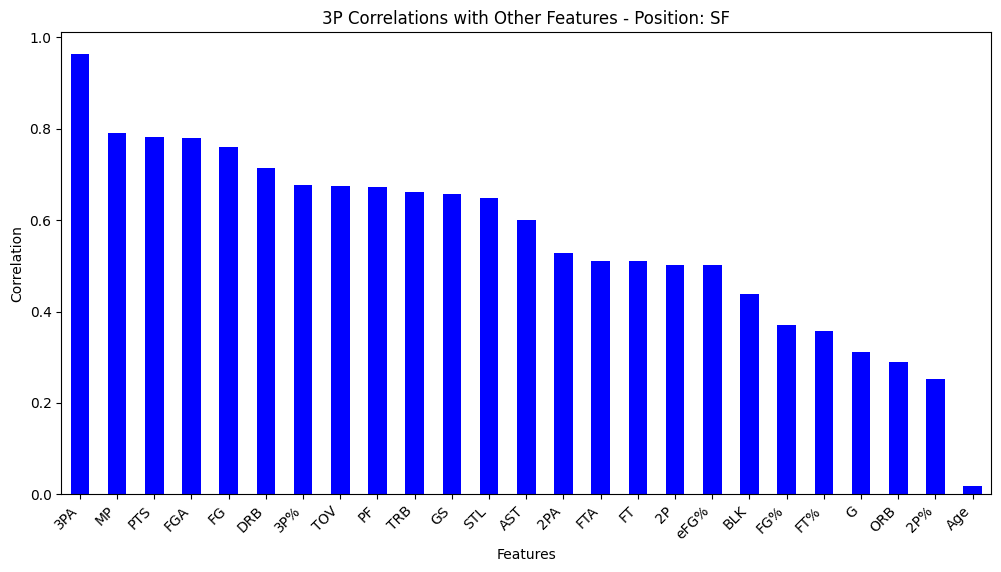

In [ ]:
SF_data=SF_data.copy()
#SF_data['Pos'] = pd.Categorical(SF_data['Pos']).codes
X = SF_data.drop(['Pos', 'Rk', 'Player', 'Tm', '3P'], axis=1)
y = SF_data['3P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'SF - Mean Squared Error: {mse}')

features = SF_data.drop(['Pos', 'Rk', 'Player', 'Tm', '3P'], axis=1)
target = SF_data['3P']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Position: SF')
plt.show()

SF_data = SF_data.drop(['Rk', 'Player', 'Tm', 'Pos'], axis=1)
correlation_matrix = SF_data.corr()

trb_correlations = correlation_matrix['3P']
sorted_trb_correlations = trb_correlations.drop('3P').sort_values(ascending=False)

correlation_df = pd.DataFrame({'Feature': sorted_trb_correlations.index, 'Correlation': sorted_trb_correlations.values})
print(correlation_df)

plt.figure(figsize=(12, 6))
sorted_trb_correlations.plot(kind='bar', color='blue')
plt.title('3P Correlations with Other Features - Position: SF')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

Ans: 從圖表中可看出，小前鋒(SF)位置的三分球命中數(3P)與三分球投籃數(3PA)具有最高的特徵重要性與相關性，表示遠離籃框出手三分球的數量越多，小前鋒投進三分球的機會也越多。

4. 得分後衛(SG)位置的三分球出手次數(3PA)與其他哪項數據具有最高的特徵重要性與相關性?

SG - Mean Squared Error: 1.2195108000000001
   Feature  Importance
24     PTS    0.298356
7       3P    0.251577
5      FGA    0.236414
4       FG    0.091122
3       MP    0.044656
9       2P    0.018664
19     AST    0.011459
22     TOV    0.005313
2       GS    0.005227
1        G    0.004806
13      FT    0.003789
21     BLK    0.003592
10     2PA    0.003353
8      3P%    0.003289
20     STL    0.002609
15     FT%    0.002423
23      PF    0.002263
14     FTA    0.001856
11     2P%    0.001734
6      FG%    0.001610
18     TRB    0.001554
16     ORB    0.001408
0      Age    0.001136
12    eFG%    0.000930
17     DRB    0.000861


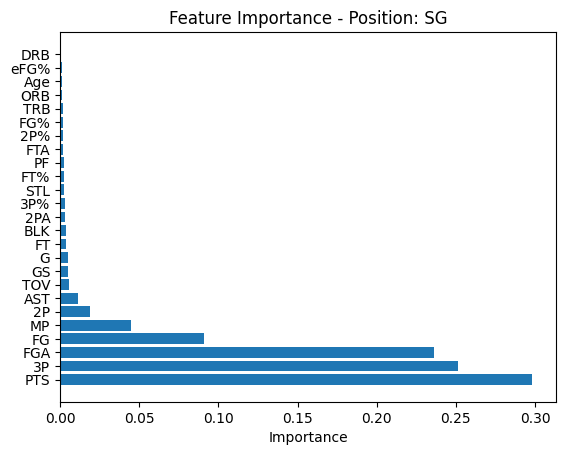

   Feature  Correlation
0      FGA     0.944233
1       3P     0.928646
2       FG     0.922800
3      PTS     0.918925
4       MP     0.916591
5      2PA     0.826356
6       2P     0.810416
7      DRB     0.797227
8       PF     0.782283
9      TRB     0.776514
10     BLK     0.755751
11     TOV     0.750690
12     AST     0.736119
13     FTA     0.703957
14      FT     0.685409
15      GS     0.667471
16     STL     0.586297
17     ORB     0.526493
18     3P%     0.515452
19     FT%     0.423536
20    eFG%     0.250096
21       G     0.228604
22     Age     0.197339
23     2P%     0.194299
24     FG%     0.160316


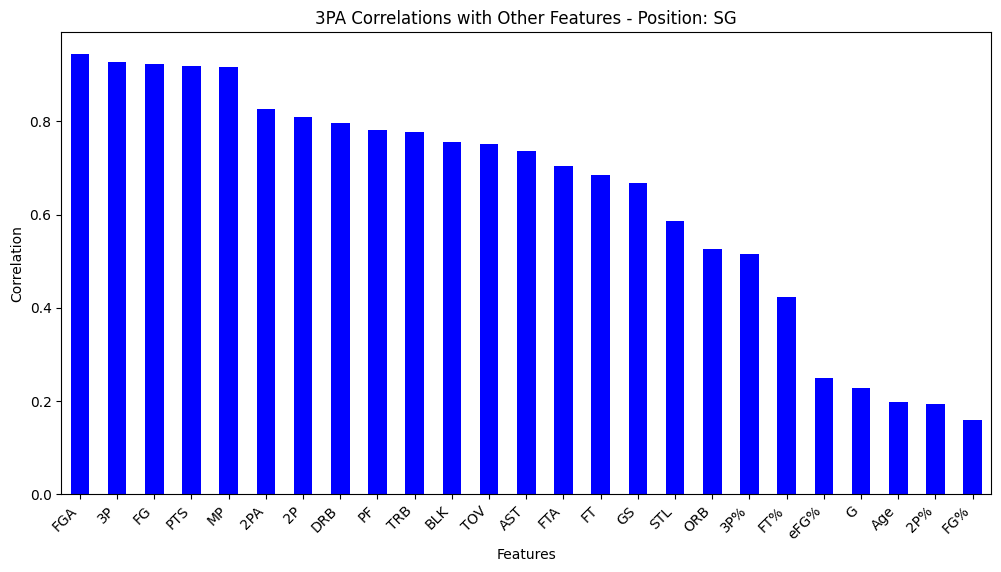

In [ ]:
SG_data=SG_data.copy()
#SG_data['Pos'] = pd.Categorical(SG_data['Pos']).codes
X = SG_data.drop(['Pos', 'Rk', 'Player', 'Tm', '3PA'], axis=1)
y = SG_data['3PA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'SG - Mean Squared Error: {mse}')

features = SG_data.drop(['Pos', 'Rk', 'Player', 'Tm', '3PA'], axis=1)
target = SG_data['3PA']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Position: SG')
plt.show()

SG_data = SG_data.drop(['Rk', 'Player', 'Tm', 'Pos'], axis=1)
correlation_matrix = SG_data.corr()

trb_correlations = correlation_matrix['3PA']
sorted_trb_correlations = trb_correlations.drop('3PA').sort_values(ascending=False)

correlation_df = pd.DataFrame({'Feature': sorted_trb_correlations.index, 'Correlation': sorted_trb_correlations.values})
print(correlation_df)

plt.figure(figsize=(12, 6))
sorted_trb_correlations.plot(kind='bar', color='blue')
plt.title('3PA Correlations with Other Features - Position: SG')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

Ans: 從圖表中可看出，得分後衛(SG)位置的三分球出手次數(3PA)與投籃數(FGA)具有最高的特徵重要性與相關性，表示在大量投籃出手的數量中，得分後衛大部分是出手三分球，但不一定有投進三分球。

5. 控球後衛(PG)位置的助攻數(AST)與其他哪項數據具有最高的特徵重要性與相關性?

PG - Mean Squared Error: 0.44300600000000023
   Feature  Importance
3       MP    0.266444
2       GS    0.241770
5      FGA    0.107690
22     TOV    0.077048
11     2PA    0.058841
20     STL    0.041204
24     PTS    0.031624
8      3PA    0.024948
18     DRB    0.024109
10      2P    0.018940
14      FT    0.013153
19     TRB    0.013150
7       3P    0.011253
23      PF    0.010595
4       FG    0.010348
15     FTA    0.008739
16     FT%    0.007840
0      Age    0.007573
1        G    0.005849
6      FG%    0.005176
13    eFG%    0.004359
12     2P%    0.003308
9      3P%    0.002503
17     ORB    0.002262
21     BLK    0.001276


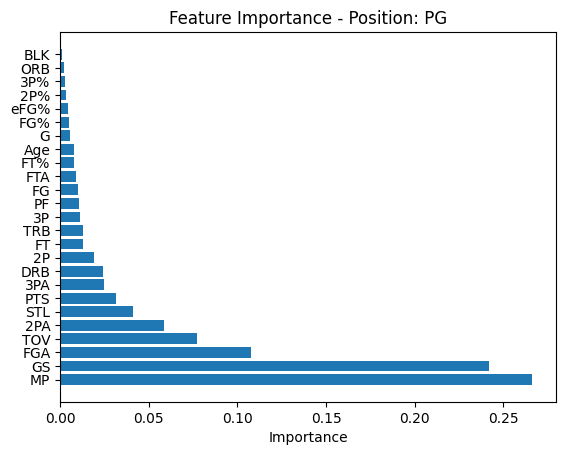

   Feature  Correlation
0       MP     0.868512
1      FGA     0.849420
2      STL     0.832584
3      PTS     0.816299
4      2PA     0.808385
5       FG     0.806212
6      TOV     0.792199
7      DRB     0.782750
8      TRB     0.778889
9      3PA     0.762639
10      2P     0.760763
11      FT     0.753999
12     FTA     0.748038
13      3P     0.715272
14      GS     0.704146
15      PF     0.696686
16     ORB     0.462799
17     FT%     0.440572
18     BLK     0.416851
19       G     0.292000
20     3P%     0.181657
21     Age     0.152093
22     FG%     0.026929
23    eFG%     0.014232
24     2P%    -0.012906


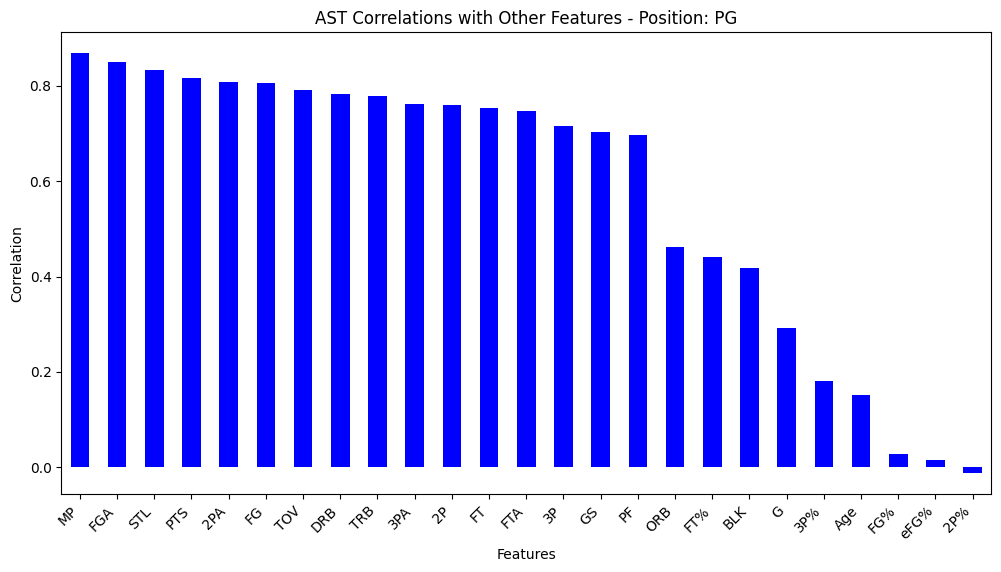

In [ ]:
PG_data=PG_data.copy()
#PG_data['Pos'] = pd.Categorical(PG_data['Pos']).codes
X = PG_data.drop(['Pos', 'Rk', 'Player', 'Tm', 'AST'], axis=1)
y = PG_data['AST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'PG - Mean Squared Error: {mse}')

features = PG_data.drop(['Pos', 'Rk', 'Player', 'Tm', 'AST'], axis=1)
target = PG_data['AST']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Position: PG')
plt.show()

PG_data = PG_data.drop(['Rk', 'Player', 'Tm', 'Pos'], axis=1)
correlation_matrix = PG_data.corr()

trb_correlations = correlation_matrix['AST']
sorted_trb_correlations = trb_correlations.drop('AST').sort_values(ascending=False)

correlation_df = pd.DataFrame({'Feature': sorted_trb_correlations.index, 'Correlation': sorted_trb_correlations.values})
print(correlation_df)

plt.figure(figsize=(12, 6))
sorted_trb_correlations.plot(kind='bar', color='blue')
plt.title('AST Correlations with Other Features - Position: PG')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

Ans: 從圖表中可看出，控球後衛(PG)位置的助攻數(AST)與上場時間(MP)具有最高的特徵重要性與相關性，表示上場時間越多，控球後衛越有機會能夠傳出助攻。